In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('/content/drive/My Drive/Asteroid_Updated.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [4]:
df2=df[~df['diameter'].isna()]
test_data = df[df['diameter'].isna()]
df2

print(df2.isnull().sum(),'\n')
df2.info()

df2.diameter = df2.diameter.astype(float)
df2.condition_code = df2.condition_code.astype(float)

name              122512
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             138
condition_code         0
n_obs_used             0
H                    747
neo                    0
pha                    0
diameter               0
extent            137620
albedo              1230
rot_per           126448
GM                137622
BV                136631
UB                136671
IR                137635
spec_B            136266
spec_T            136671
G                 137517
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   na

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [5]:
df2.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,rot_per,GM,BV,UB,IR,G,moid,n,per,ma
count,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137498.000000,137636.000000,...,11188.000000,1.400000e+01,1005.000000,965.000000,1.00,119.000000,137636.000000,137636.000000,1.376360e+05,137636.000000
mean,2.814613,0.145485,10.349182,169.827629,181.904551,2.402609,3.226618,4.884248,8969.818601,0.485207,...,23.566011,7.821928e+00,0.768844,0.364108,-0.33,0.178739,1.420145,0.219640,1.783972e+03,183.116785
std,1.522740,0.077573,6.835111,102.713052,103.556464,0.516169,2.896374,25.532565,6165.176190,1.966078,...,74.829904,1.678880e+01,0.088327,0.095707,NaN,0.134603,0.512241,0.056980,9.325769e+03,103.411497
min,0.626226,0.000489,0.021855,0.000738,0.004466,0.081882,0.999956,0.495569,1.000000,0.000000,...,0.029952,2.100000e-09,0.580000,0.120000,-0.33,-0.250000,0.000166,0.000128,1.810067e+02,0.000517
25%,2.536714,0.089623,5.120506,82.334880,91.947943,2.068948,2.864438,4.040317,6291.000000,0.000000,...,4.670000,1.022225e-03,0.700000,0.289000,-0.33,0.100000,1.082523,0.181231,1.475726e+03,94.301261
50%,2.750859,0.138543,9.389963,160.438430,183.669900,2.363897,3.167516,4.562581,7572.000000,0.000000,...,7.560000,6.192500e-01,0.743000,0.360000,-0.33,0.190000,1.384935,0.216024,1.666483e+03,186.826667
75%,3.092537,0.191141,13.738588,256.268387,271.762261,2.685811,3.468608,5.438518,9731.000000,0.000000,...,14.579500,6.500000e+00,0.850000,0.439000,-0.33,0.250000,1.699385,0.243948,1.986419e+03,271.468299
max,389.145964,0.984348,170.323647,359.990858,359.995174,40.465671,772.201080,7676.742943,72684.000000,9.000000,...,1880.000000,6.262840e+01,1.077000,0.655000,-0.33,0.600000,39.507000,1.988877,2.803930e+06,359.999979


Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and Semi major axis')

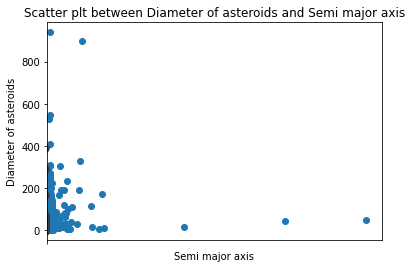

In [6]:
sns.boxplot(data=df2, y=df2['a'])
plt.title("Boxplot of semi major axis")

plt.scatter(df2['a'],df2['diameter'])
plt.xlabel("Semi major axis")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and Semi major axis")

Text(0.5, 1.0, 'Boxplot of eccentricity')

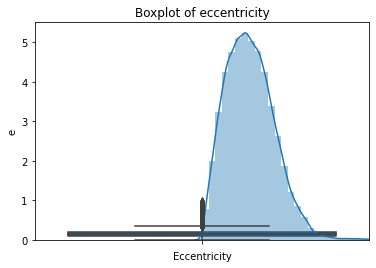

In [7]:
sns.distplot([df2], x = df2['e'])
plt.xlabel("Eccentricity")
plt.title("Distribution of eccentricity")

sns.boxplot(data=df2,y=df2['e'])
plt.title("Boxplot of eccentricity")

Text(0.5, 1.0, 'Scatter plot between eccentricity and diameter of asteroid')

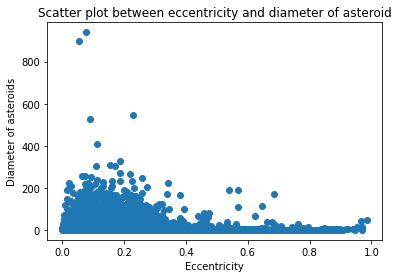

In [8]:
plt.scatter(df2['e'],df2.diameter)
plt.xlabel("Eccentricity")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between eccentricity and diameter of asteroid")

minimum value of inclination is 0.02185489628573509
50 percentile of inclination is 9.38996344892033
95 percentile of inclination is 19.46060807095649
99 percentile of inclination is 29.002069816760045
maximum value of inclination is 170.3236472007492


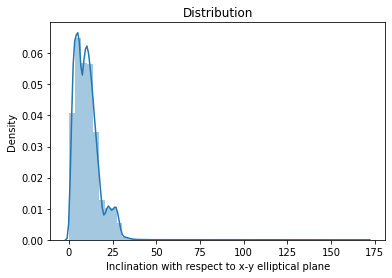

In [12]:
sns.distplot([df2], x=df2['i'])
plt.xlabel("Inclination with respect to x-y elliptical plane")
plt.title("Distribution")

print("minimum value of inclination is {}".format(min(df2['i'])))
print("50 percentile of inclination is {}".format(np.percentile(df2['i'], 50))) 
print("95 percentile of inclination is {}".format(np.percentile(df2['i'], 90))) 
print("99 percentile of inclination is {}".format(np.percentile(df2['i'], 99))) 
print("maximum value of inclination is {}".format(max(df2['i']))) 

df2 = df2[df2['i']<30]

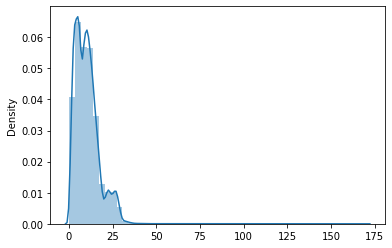

In [ ]:
sns.distplot([df2], x=df2['i'])

Text(0.5, 1.0, 'Scatter plot between Inclination and diameter of asteroid')

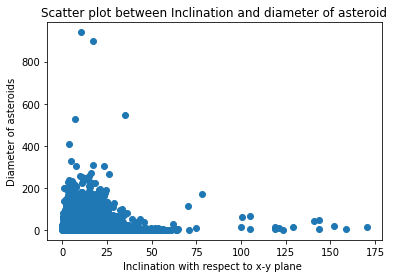

In [ ]:
plt.scatter(df2['i'],df2.diameter)
plt.xlabel("Inclination with respect to x-y plane ")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between Inclination and diameter of asteroid")

minimum value of longitude of the ascending node is 0.0007381194225785
50 percentile of longitude of the ascending node is 160.4384304493951
95 percentile of longitude of the ascending node is 321.2174492545553
99 percentile of longitude of the ascending node is 356.4063159846065
maximum value of longitude of the ascending node is 359.9908583489855


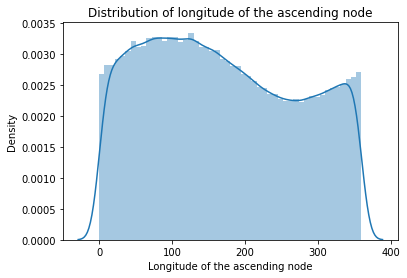

In [ ]:
sns.distplot([df2],x=df2['om'])
plt.xlabel("Longitude of the ascending node")
plt.title("Distribution of longitude of the ascending node")

print("minimum value of longitude of the ascending node is {}".format(min(df2['om'])))
print("50 percentile of longitude of the ascending node is {}".format(np.percentile(df2['om'], 50))) 
print("95 percentile of longitude of the ascending node is {}".format(np.percentile(df2['om'], 90))) 
print("99 percentile of longitude of the ascending node is {}".format(np.percentile(df2['om'], 99))) 
print("maximum value of longitude of the ascending node is {}".format(max(df2['om'])))

Text(0.5, 1.0, 'Scatter plot between ascending node and diameter of asteroid')

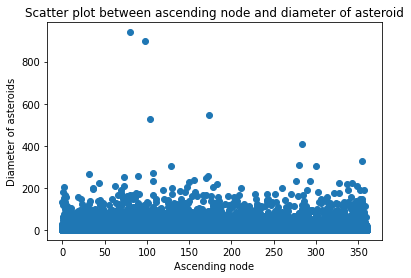

In [ ]:
plt.scatter(df2['om'],df2.diameter)
plt.xlabel("Ascending node")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between ascending node and diameter of asteroid")

minimum value of argument of perihelion is 0.00446626727791945
50 percentile of argument of perihelion is 183.66990007288655
95 percentile of argument of perihelion is 323.75648909330215
99 percentile of argument of perihelion is 356.24534282802796
maximum value of argument of perihelion is 359.9951738471951


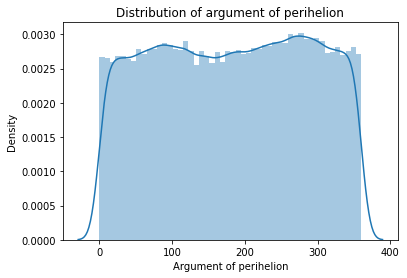

In [ ]:
sns.distplot([df2],x=df2['w'])
plt.xlabel("Argument of perihelion")
plt.title("Distribution of argument of perihelion")

print("minimum value of argument of perihelion is {}".format(min(df2['w']))) 
print("50 percentile of argument of perihelion is {}".format(np.percentile(df2['w'], 50))) 
print("95 percentile of argument of perihelion is {}".format(np.percentile(df2['w'], 90))) 
print("99 percentile of argument of perihelion is {}".format(np.percentile(df2['w'], 99))) 
print("maximum value of argument of perihelion is {}".format(max(df2['w']))) 

Text(0.5, 1.0, 'Scatter plot between argument of perihelion and diameter of asteroid')

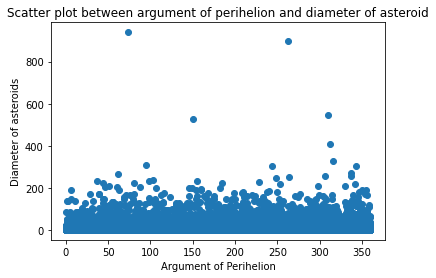

In [ ]:
plt.scatter(df2['w'],df2.diameter)
plt.xlabel("Argument of Perihelion")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between argument of perihelion and diameter of asteroid")

Minimum value of perihelion distance is 0.09204753842469984
50 percentile of perihelion distance is 2.36607471925363
95 percentile of perihelion distance is 2.88368951476623
99 percentile of perihelion distance is 4.694108984384074
Maximum value of perihelion distance is 40.46567138768128


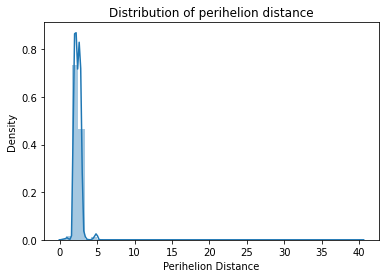

In [13]:
sns.distplot([df2],x=df2['q'])
plt.xlabel("Perihelion Distance")
plt.title("Distribution of perihelion distance")

print("Minimum value of perihelion distance is {}".format(min(df2['q'])))
print("50 percentile of perihelion distance is {}".format(np.percentile(df2['q'], 50))) 
print("95 percentile of perihelion distance is {}".format(np.percentile(df2['q'], 90))) 
print("99 percentile of perihelion distance is {}".format(np.percentile(df2['q'], 99))) 
print("Maximum value of perihelion distance is {}".format(max(df2['q']))) 

df2 = df2[df2['q']<5]

Text(0.5, 1.0, 'Scatter plot between perihelion distance and diameter of asteroid')

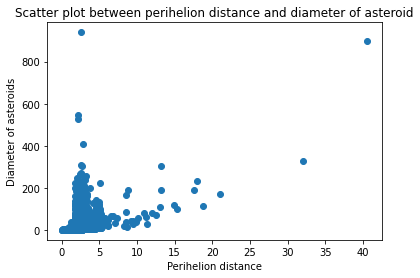

In [ ]:
plt.scatter(df2['q'],df2.diameter)
plt.xlabel("Perihelion distance")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between perihelion distance and diameter of asteroid")

In [ ]:
df2.condition_code

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
797860    1.0
798077    2.0
798189    1.0
799752    2.0
810375    3.0
Name: condition_code, Length: 137636, dtype: float64

Text(0.5, 1.0, 'Box plot of asteroid diameters for different condition code')

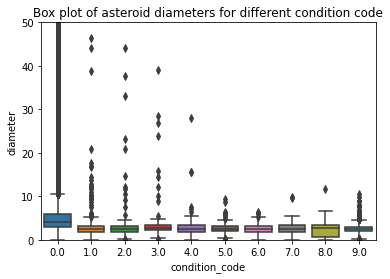

In [ ]:
sns.boxplot(data=df2, x = df2['condition_code'], y = df2['diameter'])
plt.ylim((0,50))
plt.title("Box plot of asteroid diameters for different condition code")

Text(0.5, 1.0, 'Distribution of no of observation used')

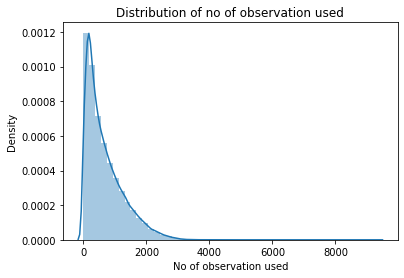

In [ ]:
sns.distplot([df2],x=df2['n_obs_used'])
plt.xlabel("No of observation used")
plt.title("Distribution of no of observation used")

Text(0.5, 1.0, 'Scatter plot between number of observation used and diameter of asteroid')

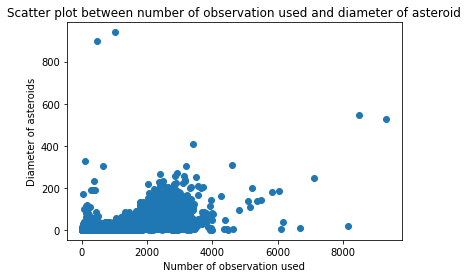

In [ ]:
plt.scatter(df2['n_obs_used'],df2.diameter)
plt.xlabel("Number of observation used")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between number of observation used and diameter of asteroid")

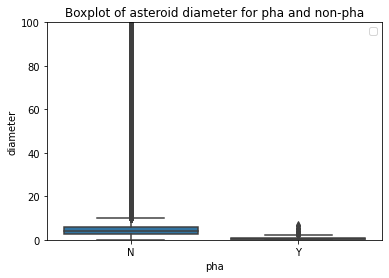

In [ ]:
sns.boxplot(data=df2,x='pha',y='diameter')
plt.title("Boxplot of asteroid diameter for pha and non-pha")
plt.ylim((0,100))
plt.legend()

In [ ]:
df2['class'].value_counts()

MBA    126390
OMB      7510
TJN      1874
IMB       588
APO       486
MCA       355
AMO       269
ATE        95
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

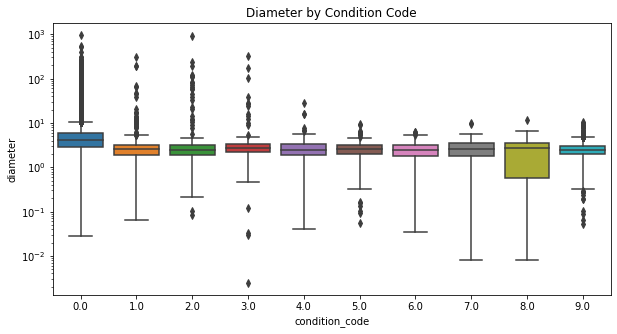

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='condition_code', y='diameter', data=df2)
plt.title('Diameter by Condition Code')
plt.yscale('log')

In [ ]:
df2.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,rot_per,GM,BV,UB,IR,G,moid,n,per,ma
count,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137498.000000,137636.000000,...,11188.000000,1.400000e+01,1005.000000,965.000000,1.00,119.000000,137636.000000,137636.000000,1.376360e+05,137636.000000
mean,2.814613,0.145485,10.349182,169.827629,181.904551,2.402609,3.226618,4.884248,8969.818601,0.485207,...,23.566011,7.821928e+00,0.768844,0.364108,-0.33,0.178739,1.420145,0.219640,1.783972e+03,183.116785
std,1.522740,0.077573,6.835111,102.713052,103.556464,0.516169,2.896374,25.532565,6165.176190,1.966078,...,74.829904,1.678880e+01,0.088327,0.095707,NaN,0.134603,0.512241,0.056980,9.325769e+03,103.411497
min,0.626226,0.000489,0.021855,0.000738,0.004466,0.081882,0.999956,0.495569,1.000000,0.000000,...,0.029952,2.100000e-09,0.580000,0.120000,-0.33,-0.250000,0.000166,0.000128,1.810067e+02,0.000517
25%,2.536714,0.089623,5.120506,82.334880,91.947943,2.068948,2.864438,4.040317,6291.000000,0.000000,...,4.670000,1.022225e-03,0.700000,0.289000,-0.33,0.100000,1.082523,0.181231,1.475726e+03,94.301261
50%,2.750859,0.138543,9.389963,160.438430,183.669900,2.363897,3.167516,4.562581,7572.000000,0.000000,...,7.560000,6.192500e-01,0.743000,0.360000,-0.33,0.190000,1.384935,0.216024,1.666483e+03,186.826667
75%,3.092537,0.191141,13.738588,256.268387,271.762261,2.685811,3.468608,5.438518,9731.000000,0.000000,...,14.579500,6.500000e+00,0.850000,0.439000,-0.33,0.250000,1.699385,0.243948,1.986419e+03,271.468299
max,389.145964,0.984348,170.323647,359.990858,359.995174,40.465671,772.201080,7676.742943,72684.000000,9.000000,...,1880.000000,6.262840e+01,1.077000,0.655000,-0.33,0.600000,39.507000,1.988877,2.803930e+06,359.999979


In [ ]:
df2["diameter"].describe()

count    137636.000000
mean          5.483228
std           9.385735
min           0.002500
25%           2.770000
50%           3.956000
75%           5.742000
max         939.400000
Name: diameter, dtype: float64

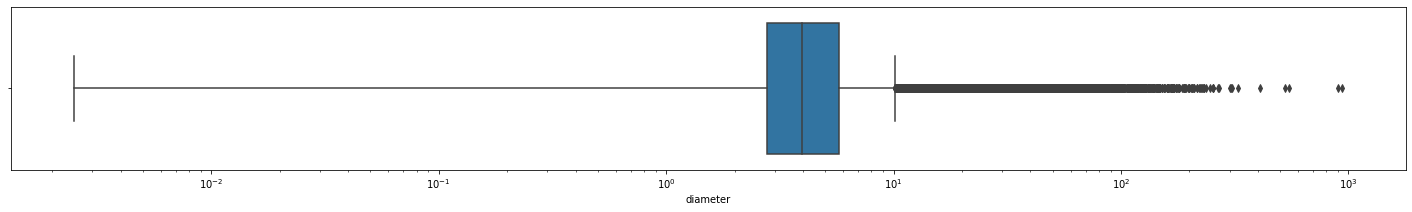

In [ ]:
plt.figure(figsize=(25,3))
sns.boxplot( x='diameter', data=df2)
plt.xscale('log')

In [14]:
drop_list = ['H','albedo','name','rot_per','spec_B',
             'BV','spec_T','UB','G',
             'extent','GM','IR','neo','pha']
df3 = df2.drop(drop_list, axis=1)

#There were originally 31 columns, test that there are only 19.
len(df3.columns)

17

In [15]:
df3['data_arc'] = df3['data_arc'].fillna(df3['data_arc'].median())

df3.isnull().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
diameter          0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136385 entries, 0 to 810375
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               136385 non-null  float64
 1   e               136385 non-null  float64
 2   i               136385 non-null  float64
 3   om              136385 non-null  float64
 4   w               136385 non-null  float64
 5   q               136385 non-null  float64
 6   ad              136385 non-null  float64
 7   per_y           136385 non-null  float64
 8   data_arc        136385 non-null  float64
 9   condition_code  136385 non-null  float64
 10  n_obs_used      136385 non-null  int64  
 11  diameter        136385 non-null  float64
 12  moid            136385 non-null  float64
 13  class           136385 non-null  object 
 14  n               136385 non-null  float64
 15  per             136385 non-null  float64
 16  ma              136385 non-null  float64
dtypes: float64

In [18]:
categorical_column = ['class','condition_code']

for i in categorical_column:
  x = pd.get_dummies(df3[i],drop_first = True)
  df3 = pd.concat([df3,x],axis=1)

df3.drop(categorical_column,axis=1, inplace = True)

In [19]:
df3.columns

Index([         'a',          'e',          'i',         'om',          'w',
                'q',         'ad',      'per_y',   'data_arc', 'n_obs_used',
         'diameter',       'moid',          'n',        'per',         'ma',
              'APO',        'AST',        'ATE',        'CEN',        'IMB',
              'MBA',        'MCA',        'OMB',        'TJN',          1.0,
                2.0,          3.0,          4.0,          5.0,          6.0,
                7.0,          8.0,          9.0],
      dtype='object')

Model Selection


In [20]:
X = df3.drop("diameter",axis=1)
y = df3["diameter"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [21]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40916 entries, 626652 to 233587
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   a           40916 non-null  float64
 1   e           40916 non-null  float64
 2   i           40916 non-null  float64
 3   om          40916 non-null  float64
 4   w           40916 non-null  float64
 5   q           40916 non-null  float64
 6   ad          40916 non-null  float64
 7   per_y       40916 non-null  float64
 8   data_arc    40916 non-null  float64
 9   n_obs_used  40916 non-null  int64  
 10  moid        40916 non-null  float64
 11  n           40916 non-null  float64
 12  per         40916 non-null  float64
 13  ma          40916 non-null  float64
 14  APO         40916 non-null  uint8  
 15  AST         40916 non-null  uint8  
 16  ATE         40916 non-null  uint8  
 17  CEN         40916 non-null  uint8  
 18  IMB         40916 non-null  uint8  
 19  MBA         40916 n

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_train)
train_error_linear = mean_squared_error(y_train,y_pred)
y_test_pred=lr.predict(X_test)
test_error_linear = mean_squared_error(y_test,y_test_pred)

test_error_linear

45.33455571703317

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=400, max_features=5, max_depth=6)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)
pred

array([2.74566017, 6.3000161 , 6.01589022, ..., 2.88622609, 3.90923402,
       2.92776423])

In [ ]:
print('Training Accuracy : ' , rf_reg.score(X_train, y_train))
print('Test Accuracy : ' , rf_reg.score(X_test, y_test))

Training Accuracy :  0.6482997066737823
Test Accuracy :  0.6134339821870125


In [16]:
from sklearn.model_selection import RandomizedSearchCV
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid,n_candidates, cv=3, scoring_fit=None,
                       do_probabilities = False,verbose=1 ):
    rs = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid, 
        n_iter=n_candidates,
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=verbose
    )
    fitted_model = rs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [25]:
from xgboost import XGBRegressor
XGBReg = XGBRegressor()

eval_set=[(X_test,y_test)]
XGBReg.fit(X_train, y_train,eval_metric="error",eval_set=eval_set, early_stopping_rounds=10, verbose=0)

[06:48:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [26]:
print(f"Training score: {XGBReg.score(X_train, y_train)}")
print(f"Testing score: {XGBReg.score(X_test, y_test)}")

y_pred= XGBReg.predict(X_test)
print(f'\nMean Squared Error: {mean_squared_error(y_test, y_pred)}')

Training score: -0.1659789898538786
Testing score: -0.14336371898329703

Mean Squared Error: 91.08877731233693


In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
# Creating model using the Sequential in tensorflow
def build_sequential():
  ANN= keras.Sequential([
#input layer
    keras.layers.Dense(40, input_dim=X_train.shape[1],activation="relu"),
#hidden layers
    keras.layers.Dropout(0.4), 
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dropout(0.4), 
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dropout(0.3),  
#output layer
    keras.layers.Dense(1, activation='linear')
])
  return ANN
# build the model
ANN = build_sequential()

In [29]:
ANN.compile(loss="mean_squared_error", optimizer='adam', metrics=["mse"])

In [30]:
##The model weights will be updated after each batch of 64 samples.
ANN.fit(X_train, y_train, epochs=10, batch_size=64,validation_split=0.2)
ANN.summary()

Epoch 1/10
1194/1194 [==============================] - 7s 3ms/step - loss: 65420.8242 - mse: 65420.8242 - val_loss: 78.1984 - val_mse: 78.1984
Epoch 2/10
1194/1194 [==============================] - 4s 3ms/step - loss: 1110.2312 - mse: 1110.2312 - val_loss: 73.0513 - val_mse: 73.0513
Epoch 3/10
1194/1194 [==============================] - 4s 3ms/step - loss: 388.2620 - mse: 388.2620 - val_loss: 72.7015 - val_mse: 72.7015
Epoch 4/10
1194/1194 [==============================] - 4s 3ms/step - loss: 253.1205 - mse: 253.1205 - val_loss: 68.6361 - val_mse: 68.6361
Epoch 5/10
1194/1194 [==============================] - 4s 3ms/step - loss: 121.1936 - mse: 121.1936 - val_loss: 65.7612 - val_mse: 65.7612
Epoch 6/10
1194/1194 [==============================] - 4s 3ms/step - loss: 106.5241 - mse: 106.5241 - val_loss: 55.0343 - val_mse: 55.0343
Epoch 7/10
1194/1194 [==============================] - 4s 3ms/step - loss: 80.2137 - mse: 80.2137 - val_loss: 61.4828 - val_mse: 61.4828
Epoch 8/10
1194/

In [31]:
ANN.evaluate(X_test,y_test)

1279/1279 [==============================] - 3s 2ms/step - loss: 70.0237 - mse: 70.0237


[70.0236587524414, 70.0236587524414]

In [32]:
from sklearn.metrics import r2_score

In [33]:
y_pred=ANN.predict(X_test)
r2_score(y_test,y_pred)

1279/1279 [==============================] - 2s 1ms/step


0.12105041504687275

In [34]:
from sklearn.neural_network import MLPRegressor
mlpReg=MLPRegressor()
mlpReg.fit(X_train,y_train)

MLPRegressor()

In [35]:
print(f"Training score: {mlpReg.score(X_train, y_train)}")
print(f"Testing score: {mlpReg.score(X_test, y_test)}")

y_pred= mlpReg.predict(X_test)
print(f'\nMean Squared Error: {mean_squared_error(y_test, y_pred)}')

Training score: 0.1770703300918257
Testing score: 0.29288050449166225

Mean Squared Error: 56.334348545575956


In [36]:
drop_list = ['H','albedo','name','rot_per','spec_B',
             'BV','spec_T','UB','G',
             'extent','GM','IR','neo','pha']
test_data.drop(drop_list, axis=1, inplace = True)

categorical_column = ['class','condition_code']

for i in categorical_column:
  x = pd.get_dummies(test_data[i],drop_first = True)
  test_data = pd.concat([test_data,x],axis=1)

test_data.drop(categorical_column,axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
mlpReg.predict(test_data)